## Salary prediction for Kaggle Data Scientists

In this exercise, we will explore the data from the 2017 Kaggle survey. The goal is to find what is the most important criterion for the salary of a data scientist. The data is available [here](https://kermorvant.github.io/csexed-ml/data/kaggle2017.xlsx)

**Questions:**
> * Load the Kaggle dataset with `pd.read_excel('kaggle2017.xlsx')` 
> * print a few lines of the dataset (`df.head()`) and compute basic statistics (`df.describe()`)


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('../data/kaggle2017.xlsx')
df

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,MajorSelect,Salary
0,Female,Other,22.0,"Independent contractor, freelancer, or self-em...",Predictive Modeler,Computer Science,4000
1,Female,France,22.0,Employed full-time,Data Analyst,Mathematics or statistics,35000
2,Female,Germany,24.0,Employed part-time,Scientist/Researcher,NaN,480
3,Female,Greece,24.0,Employed full-time,DBA/Database Engineer,Computer Science,25000
4,Female,Other,24.0,Employed full-time,Scientist/Researcher,Mathematics or statistics,36000
5,Female,France,24.0,Employed full-time,Data Scientist,Mathematics or statistics,40000
6,Female,Italy,25.0,Employed full-time,Data Scientist,Physics,1000
7,Female,Other,25.0,Employed full-time,Data Scientist,Mathematics or statistics,24000
8,Female,Spain,25.0,Employed full-time,Data Scientist,Physics,26000
9,Female,France,25.0,Employed full-time,Data Scientist,Mathematics or statistics,31000


In [2]:
df.describe()

,Age,Salary
count,748.000000,748.000000
mean,35.144385,50591.574866
std,9.254284,31352.018072
min,21.000000,0.000000
25%,28.000000,30000.000000
50%,33.000000,45000.000000
75%,40.000000,65000.000000
max,78.000000,250000.000000


The categorical data are not described with the function `df.describe()`.

* Plot the distribution of each categorical values with `sns.countplot(data=df3,y='GenderSelect')`


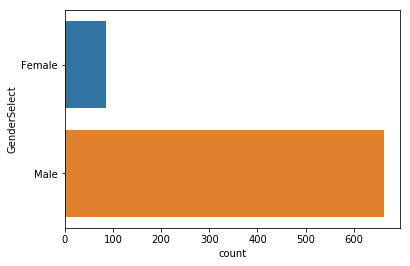

In [33]:
sns.countplot(data=df,y='GenderSelect')


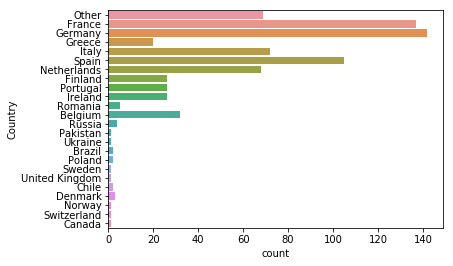

In [7]:
sns.countplot(data=df,y='Country')

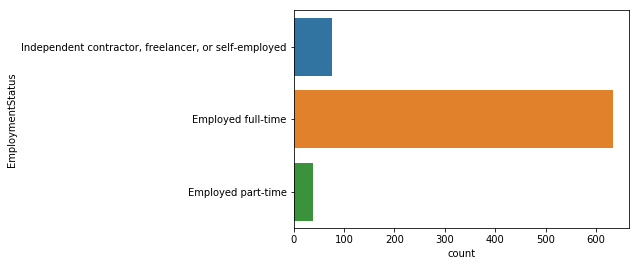

In [35]:
sns.countplot(data=df,y='EmploymentStatus')

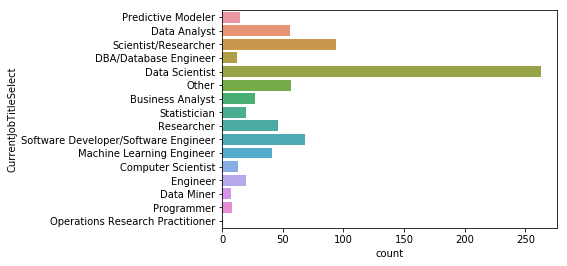

In [36]:
sns.countplot(data=df,y='CurrentJobTitleSelect')

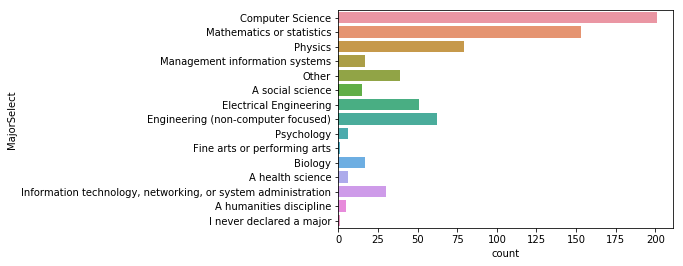

In [37]:
sns.countplot(data=df,y='MajorSelect')

The categorical data can not be directly used in most classifiers, their values must be encoded for example with an integer associated to each different category. 
> * Encode the categorical data with a [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Missing values must be filled before fitting the encoder (use `fillna('UNK')` on each column).
> * print a few lines of the dataset to see the effect of the encoder.


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for c in ['GenderSelect','Country','EmploymentStatus','CurrentJobTitleSelect','MajorSelect']:
    df[c+'_label'] = le.fit_transform(df[c].fillna('UNK'))
    # print the encoded values
    print (c)
    print ([(idx,val) for idx,val in  enumerate(le.classes_)])
    print()
df.head()

GenderSelect
[(0, 'Female'), (1, 'Male')]

Country
[(0, 'Belgium'), (1, 'Brazil'), (2, 'Canada'), (3, 'Chile'), (4, 'Denmark'), (5, 'Finland'), (6, 'France'), (7, 'Germany'), (8, 'Greece'), (9, 'Ireland'), (10, 'Italy'), (11, 'Netherlands'), (12, 'Norway'), (13, 'Other'), (14, 'Pakistan'), (15, 'Poland'), (16, 'Portugal'), (17, 'Romania'), (18, 'Russia'), (19, 'Spain'), (20, 'Sweden'), (21, 'Switzerland'), (22, 'Ukraine'), (23, 'United Kingdom')]

EmploymentStatus
[(0, 'Employed full-time'), (1, 'Employed part-time'), (2, 'Independent contractor, freelancer, or self-employed')]

CurrentJobTitleSelect
[(0, 'Business Analyst'), (1, 'Computer Scientist'), (2, 'DBA/Database Engineer'), (3, 'Data Analyst'), (4, 'Data Miner'), (5, 'Data Scientist'), (6, 'Engineer'), (7, 'Machine Learning Engineer'), (8, 'Operations Research Practitioner'), (9, 'Other'), (10, 'Predictive Modeler'), (11, 'Programmer'), (12, 'Researcher'), (13, 'Scientist/Researcher'), (14, 'Software Developer/Software Engineer

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,MajorSelect,Salary,GenderSelect_label,Country_label,EmploymentStatus_label,CurrentJobTitleSelect_label,MajorSelect_label
0,Female,Other,22.0,"Independent contractor, freelancer, or self-em...",Predictive Modeler,Computer Science,4000,0,13,2,10,4
1,Female,France,22.0,Employed full-time,Data Analyst,Mathematics or statistics,35000,0,6,0,3,11
2,Female,Germany,24.0,Employed part-time,Scientist/Researcher,NaN,480,0,7,1,13,15
3,Female,Greece,24.0,Employed full-time,DBA/Database Engineer,Computer Science,25000,0,8,0,2,4
4,Female,Other,24.0,Employed full-time,Scientist/Researcher,Mathematics or statistics,36000,0,13,0,13,11


In [15]:
print (le.classes_)

['A health science' 'A humanities discipline' 'A social science' 'Biology'
 'Computer Science' 'Electrical Engineering'
 'Engineering (non-computer focused)' 'Fine arts or performing arts'
 'I never declared a major'
 'Information technology, networking, or system administration'
 'Management information systems' 'Mathematics or statistics' 'Other'
 'Physics' 'Psychology' 'UNK']


A decision tree can be used both for classification of for regression. In our case, since we want to predict the salary of a data scientist, we will use decision trees for regression.
> * Define the features X and the target y (= Salary)
> * Fit a decision [DecisionTreeRegressor](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) to predict the Salary


In [4]:
X = df[['Age','GenderSelect_label','Country_label','EmploymentStatus_label','CurrentJobTitleSelect_label','MajorSelect_label']]
y = df['Salary']

In [24]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

The tree can be display to see which rules have been used. The follwing functions plot the decision tree previously trained. 

**Question**:
>  what is the first splitting node ?

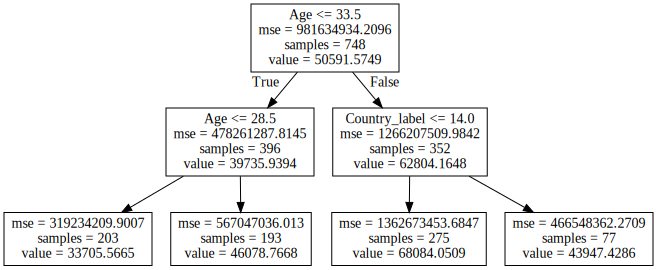

In [19]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(regr, out_file=None,feature_names=['Age','GenderSelect_label','Country_label','EmploymentStatus_label','CurrentJobTitleSelect_label','MajorSelect_label'])
graph = graphviz.Source(dot_data)  
graph 

A RandomForest model can also be used to find the most important features in classification or regression problems. The importance of a feature is related to the number of times it is used in the different trees of the random forest.

The following code (adapted form [this code](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)) plot the feature importance on the Kaggle problem. 

**Question**
> * What is the most important feature to predict the salary ?
> 

Feature ranking:
1. feature 0 Age(0.348217)
2. feature 2 Country_label(0.240548)
3. feature 4 CurrentJobTitleSelect_label(0.161525)
4. feature 5 MajorSelect_label(0.158335)
5. feature 3 EmploymentStatus_label(0.064614)
6. feature 1 GenderSelect_label(0.026761)


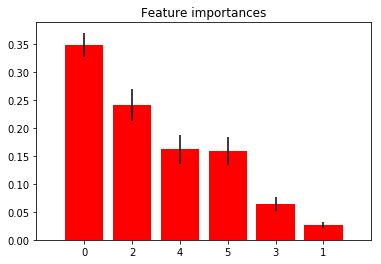

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor()
feature_names=['Age','GenderSelect_label','Country_label','EmploymentStatus_label','CurrentJobTitleSelect_label','MajorSelect_label']
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s(%f)" % (f + 1, indices[f],feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

You can use the forest to predict you salary (according to Kaggle standards): 

**Question**    
> * create a list with your parameters `['Age','GenderSelect_label','Country_label','EmploymentStatus_label','CurrentJobTitleSelect_label','MajorSelect_label']` encoded with the values previously defined with the LabelEncoder()
> * predict with the forest 

In [25]:
#['Age','GenderSelect_label','Country_label','EmploymentStatus_label','CurrentJobTitleSelect_label','MajorSelect_label']]
x = [40,0,12,0,12,4]
regr.predict(x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([38000.])